In [1]:
%matplotlib inline
import csv
import collections
import pprint
import sys
import pandas as pd
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, show
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics


In [2]:
csv.field_size_limit(sys.maxsize)

131072

In [16]:
main_file = "/Users/wevers/Data/trust.csv" 

In [17]:
single = pd.read_csv(main_file, header=0, sep=',', names = ["date", "newspaper", "title", "content"])
#data = data.set_index(pd.DatetimeIndex(data['paper_dc_date']))

In [18]:
single = single.drop_duplicates(['title']) #remove duplicate articles based on article title

In [19]:
single['newspaper'] = single['newspaper'].apply(lambda x: x.split(':')[0]) #strip cell after :
single['newspaper'] = single['newspaper'].apply(lambda x: x.split('/')[0]) #strip cell after /
single['newspaper'] = single['newspaper'].str.lower().str.replace('ĳ', 'ij') #fix error with ij
single['content'] = single['content'].str.lower() #lower-case text content
single['title'] = single['title'].str.lower() #lower-case text content
single = single.dropna()

In [20]:
single = single[single['title'].str.contains("slotkoersen") == False]
single = single[single['title'].str.contains("fondsen") == False]
single = single[single['title'].str.contains("vereen.") == False]
single = single[single['title'].str.contains("wekelijksch") == False]
single = single[single['title'].str.contains("financ.") == False]
single = single[single['title'].str.contains("beurs") == False]
single = single[single['title'].str.contains("obligatiën") == False]
single = single[single['title'].str.contains("vereeniging") == False]
single = single[single['title'].str.contains("officieele") == False]
single = single[single['title'].str.contains("effectenhandel.") == False]
single = single[single['title'].str.contains("financieele") == False]
single = single[single['title'].str.contains("noteeringen.") == False]
single = single[single['title'].str.contains("koersverloop ") == False]
single = single[single['title'].str.contains("aandeelen.") == False]
single = single[single['title'].str.contains("effecten") == False]
single = single[single['title'].str.contains("beurzen.") == False]
single = single[single['title'].str.contains("beurzen") == False]
single = single[single['title'].str.contains("aandelen") == False]
single = single[single['title'].str.contains("wallstreet") == False]
single = single[single['title'].str.contains("shares") == False]

In [29]:
single[single['date']].plot.line()

KeyError: "['1890-05-09' '1890-05-15' '1890-10-31' ..., '1989-07-20' '1989-12-23'\n '1989-08-02'] not in index"

In [23]:
single = single.dropna()

In [24]:
single.to_csv('trust_clean.csv', index=False) #export to csv

In [31]:
ts = pd.Series(index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

In [9]: df3['A'] = pd.Series(list(range(len(df))))

In [10]: df3.plot(x='A', y='B')

SyntaxError: invalid syntax (<ipython-input-31-9ce2557499a8>, line 7)

In [64]:
pd.Series(' '.join(single['title']).lower().split()).value_counts()[1:700]  

van                     366
en                      209
in                      150
het                     138
amsterdam,              114
new                     102
een                      94
op                       72
york                     71
amsterdam.               65
door                     60
der                      57
uit                      50
—                        49
amsterdam                47
den                      46
over                     45
prijscourant             41
slot                     40
te                       39
voor                     36
nieuw-york               33
berichten,               33
betaalbaarstellingen     31
prijscourant.            30
1                        28
tobacco                  27
index                    26
vor.                     25
kroniek.                 25
                       ... 
daling                    2
onderscheidingen.         2
new-york                  2
beirs                     2
beperkte            

In [58]:
threshold = 25 # Anything that occurs less than this will be removed.
value_counts = single['newspaper'].value_counts()
to_remove = value_counts[value_counts <= threshold].index
single['newspaper'].replace(to_remove, inplace=True)

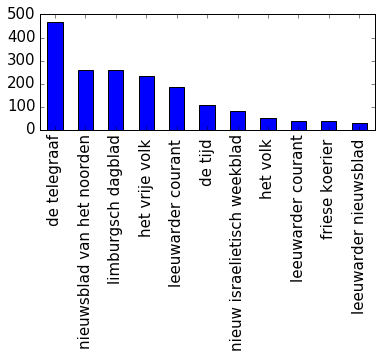

In [68]:
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().subplots_adjust(bottom=0.50)
plot = single['newspaper'].value_counts().plot(kind="bar") #plot newspaper_titles

In [74]:
fig = plot.get_figure() #export plot to PNG file
fig.set_size_inches(15, 15)
fig.tight_layout()
fig.subplots_adjust(bottom=0.25)
fig.savefig('Coca-Cola-CorpusB_ads.pdf', format='pdf', dpi=1000)

In [15]:
single['merged'] = single['title'].map(str) + single['content'].map(str)

In [37]:
single

,date,newspaper,title,content,merged
0,1984-06-16,de telegraaf,EXPLOSIE VAN ELEKTRONICA EN ENERGIE Laurie And...,Laurie Anderson is een artieste met een boodsc...,EXPLOSIE VAN ELEKTRONICA EN ENERGIE Laurie And...
1,1957-11-26,de waarheid,Bekwaamheden,"'t W/""ORDT tijd dat de president "" opkrast, vi...","Bekwaamheden't W/""ORDT tijd dat de president ""..."
2,1941-12-30,dagelijksche beurscourant,De invoer van Orienttabak in de U.S.A. Geen Am...,"Naar eenige dagen geleden bekend werd, zijn de...",De invoer van Orienttabak in de U.S.A. Geen Am...
3,1906-01-25,nieuwe tilburgsche courant,Van ezeldrijver tot President.,"President Castro, van Venezuela, _ die var* ez...",Van ezeldrijver tot President.President Castro...
4,1964-05-29,leeuwarder courant,Stat. jaarboek Ver. Naties In 1962 14.1 mln. p...,Volgens de Jongste uitgave van het statistisch...,Stat. jaarboek Ver. Naties In 1962 14.1 mln. p...
5,1964-08-20,de waarheid,Sigarettenverbruik USA sterk gestegen Longkank...,"Het sigarettenverbruik inde Verenigde Staten, ...",Sigarettenverbruik USA sterk gestegen Longkank...
6,1964-02-15,de tijd de maasbode,Honger in het paradijs I,"Er U op het ogenblik geen bock, dat in de poli...",Honger in het paradijs IEr U op het ogenblik g...
7,1947-03-05,nieuwsblad van het zuiden,Van dc Nieuwe naar de Oude Wereld De laatste d...,"Van WALTHER VICTOR, correspondent van Unicos P...",Van dc Nieuwe naar de Oude Wereld De laatste d...
8,1978-06-30,nieuw israelietisch weekblad,Amerika en Israël verlagen invoerrechten,De Verenigde Staten en Israël zijn in principe...,Amerika en Israël verlagen invoerrechtenDe Ver...
9,1971-06-19,de telegraaf,AMERIKAANSE CONFECTIEFABRIKANTEN ZIJN BOOS OP ...,"AMSTERDAM, zaterdag Do Nederlandse confcctie-...",AMERIKAANSE CONFECTIEFABRIKANTEN ZIJN BOOS OP ...
